# Chapter 1 - Exploratory Data Analysis
This chapter introduces basics concepts in statistics.

In [5]:
import pandas as pd
from scipy import stats
state = pd.read_csv('state.csv')
state.head(15)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [11]:
# Mean, trimmed mean and median for the population
print(state['Population'].mean())
print(state['Population'].median())
# We need scipy to do the trimmed mean, it drops 10% from each end
print(stats.trim_mean(state['Population'], 0.1))

6162876.3
4436369.5
4783697.125


## Estimates of Variability
Measures whether the data values are tightly clustered or spread out. Some are:
- **Deviations**: Difference between the observed values and the estimate of location. (errors, residuals)
- **Variance**: The sum of squared deviations from the mean divided by $n - 1$ where $n$ is the number of data values. (mean-squared-error)
- **Standard deviation**: square root of the variance
- **Mean absolute deviation**: The mean of the absolute values of the deviations from the mean. ( l1-norm, Manhattan norm)
- **Median absolute deviation from the median (MAD)**: 
- **Range**: THe difference between the largest and the smallest value in dataset.
- **Order statistics**: Metrics based on the data values sorted from smallest to biggest. (ranks)
- **Percentile**: The value such that P percent of the values take on this value or less and (100-P) percent take on this value or more. (quantile)
- **Interquartile range**: Difference between the 75th and the 25th percentile. (IQR)

The standard deviation is preferred in statistics over the mean absolute deviation

In [12]:
# standard deviation
print(state['Population'].std())
# the interquartile range (IQR)
print(state['Population'].quantile(.75) - state['Population'].quantile(.25))
# median absolute deviation from the median (MAD)
from statsmodels.robust.scale import mad
print(mad(state['Population']))

6848235.347401142
4847308.0
3849876.1459979336


## Exploring the Data Distribution
- **Boxplot**: are based on percentiles.
- **Frequency table**
- **Histogram**
- **Density plot**

In [19]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

<AxesSubplot:>

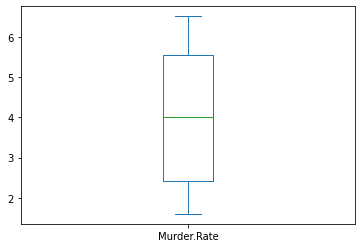

In [22]:
# boxplot of custom quantiles
(state['Murder.Rate']
.quantile([0.05, 0.25, 0.5, 0.75, 0.95])
.plot.box())

Text(0, 0.5, 'Population (millions)')

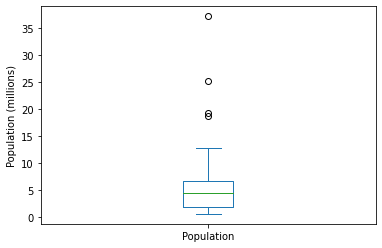

In [23]:
ax = (state['Population'] / 1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

The points are outliers, the green line represents the median, the top and bottom of the box are the 75th and 25th percentiles. The whiskers wil not go beyond 1.5 times the IQR.

## Frequency Tables and Histograms

It divides up the varaible range into equally spaced segments and count how many fall within each segment.

In [27]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Bin sizes are important, if they are too large, important features of the distribution can be obscured, if they are too small, the result is too granular and we can't see the bigger picture.